In [1]:
import ROOT as r
import matplotlib.pyplot as plt
import numpy as np

Welcome to JupyROOT 6.24/02


In [2]:
infile = '/home/jlab/github/MonteCarlo/build/pienux_out.root'
f = r.TFile(infile)
t = f.Get("t")

print([x.GetName() for x in t.GetListOfBranches()])

['n', 'm', 'trk', 'stp', 'vlm', 'pro', 'pdg', 'pid', 'dt', 'de', 'dl', 'l', 'x', 'y', 'z', 't', 'k', 'p', 'q', 'et', 'px', 'py', 'pz']


In [3]:
alltimes = []
allcounts = []

# h = r.TH2D("h", "Fuzzy LXe Template", 1000,-200,800)

for i, e in enumerate(t):
    # print(i)
    try:
        times = np.array([ x for i,x in enumerate(e.t) if ( e.vlm[i] == 1004 and e.pdg[i] == 0) ])
        times = times - np.amin(times)

        hist = np.histogram(times,bins=2000, range=(-200,400))

        # for i,x in enumerate(hist[0])

        # print(times[:10])
        alltimes.append(hist)
        allcounts.append(times.size)
    except:
        pass 

    # plt.hist(e.t,bins=400, range=(0,400)
    # if(i > 3):
    #     break

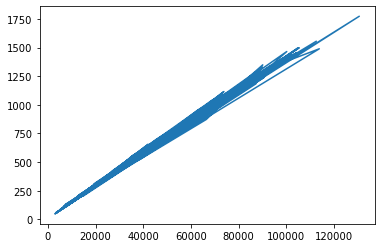

In [4]:
plt.plot(allcounts, [np.amax(x[0]) for x in alltimes])

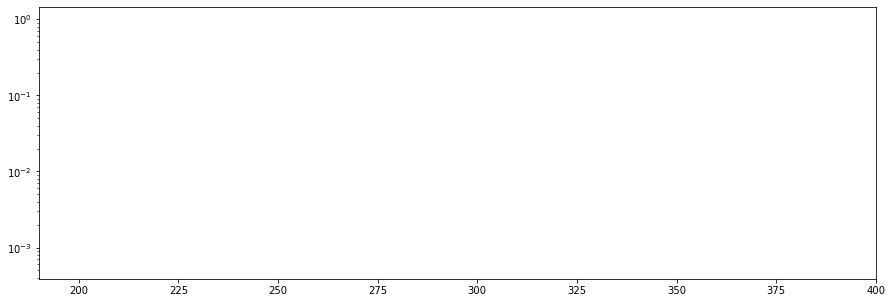

In [43]:
fig,ax = plt.subplots(figsize=(15,5))
for x in alltimes:
    plt.plot(x[0]/np.amax(x[0]))
plt.yscale("log")
plt.xlim(190,400)
plt.show()

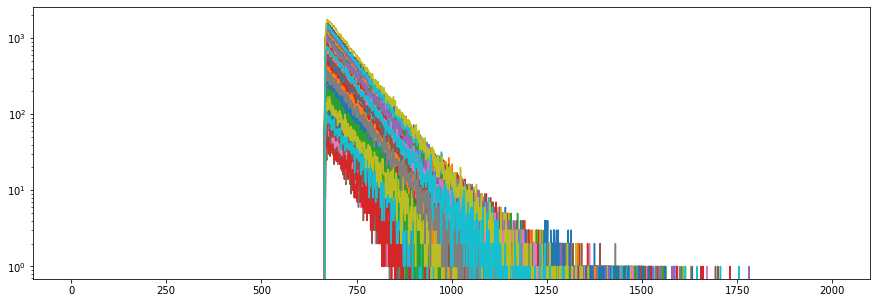

In [44]:
fig,ax = plt.subplots(figsize=(15,5))
for x in alltimes:
    plt.plot(x[0])
plt.yscale("log")
plt.show()

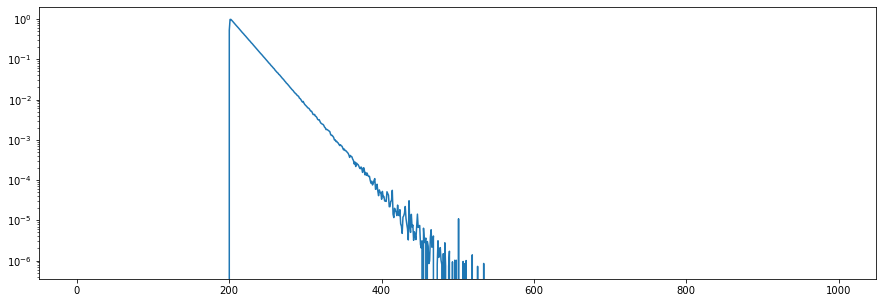

In [20]:
average_hist = []
hist_weights = []
vals = [x[0]/np.amax(x[0]) for x in alltimes]

for x in zip(*vals):
    # print(x)
    average_hist.append(np.mean(x))
    hist_weights.append(np.std(x))
    # break

fig,ax = plt.subplots(figsize=(15,5))
plt.plot(average_hist)
plt.yscale("log")
plt.show()

In [29]:
# fig,ax = plt.subplots(figsize=(7,4))
# hist = plt.hist(alltimes,bins=1000, range=(-200,800))
# plt.yscale("log")
# # plt.xlim(0,40)
# plt.show()

In [30]:
from template_fit import LXeTemplate

In [31]:
def make_template_from_histogram(hist, outfile):
    # from template_fit import LXeTemplate
    ys = hist[0]
    ys /= np.amax(ys)
    centers = hist[1][:-1] + (hist[1][0]+hist[1][1])/2.0

    template = LXeTemplate()
    template.form_template(centers, ys)
    return template 

# template = make_template_from_histogram(hist, '')
template = make_template_from_histogram((average_hist, hist[1]), '')

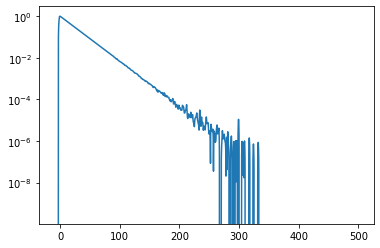

In [38]:
xs = np.linspace(-10,500,10000)
plt.plot(xs, template.template(xs))
plt.yscale("log")
# plt.xlim(-10,10)
plt.show()

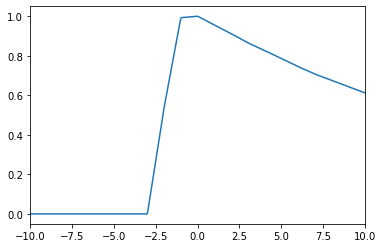

In [39]:
xs = np.linspace(-10,500,10000)
plt.plot(xs, template.template(xs))
# plt.yscale("log")
plt.xlim(-10,10)
# plt.xlim(-10,10)
plt.show()

In [34]:
template.save("lxe.template")

In [35]:
import pickle
with open('ding.pickle', 'wb') as f:
    pickle.dump('hello', f)

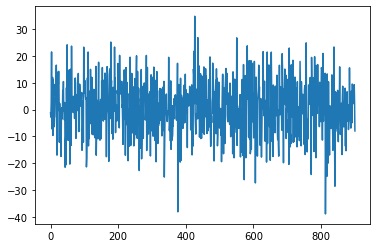

In [36]:
def make_fake_data_from_template(template, times, amplitudes, noise=True, noisefloor=10):
    assert len(times) == len(amplitudes)

    limits = (np.amin(times) - 10, np.amax(times) + 400)
    xs = np.linspace(*limits, int(limits[1] - limits[0]))
    ys = np.zeros_like(xs)

    for i, (t, a) in enumerate(zip(times,amplitudes)):
        # print(i, t, a)
        ys += template(xs - t) * a 
        # plt.plot(xs, template(xs - t) * a )

    # plt.show()

    if noise:
        ys += np.random.normal(0, noisefloor, ys.size)

    return xs, ys

ding = make_fake_data_from_template(template.template, [10,130,500], [1,1,1])
plt.plot(*ding)
# plt.yscale("log")
plt.show()